In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load training and testing data

In [2]:
from proj1_helpers import *
from implementations import *

In [3]:
DATA_TRAIN_PATH = './data/train.csv'
y, x, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
DATA_TEST_PATH = './data/test.csv'
_, x_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [5]:
# check the percentage of two labels
print("The percentage of 's' label in y is {:.2f}%".format(100 * y[y == 1].size / y.size))
print("The percentage of 'b' label in y is {:.2f}%".format(100 * y[y == -1].size / y.size))

The percentage of 's' label in y is 34.27%
The percentage of 'b' label in y is 65.73%


## Feature processing

In [6]:
# split training data into training and validation
y_train, y_val, x_train, x_val = train_val_split(y, x, 0.2, seed=1)

# normalize data using metrics of training data (except PRI_jet_num (22th column) since it is a discrete value)
nor_indices = [idx for idx in range(x_train.shape[1]) if idx != 22]
nor_x_train = x_train.copy()
nor_x_val = x_val.copy()
nor_x_test = x_test.copy()

x_train_mean = x_train[:, nor_indices].mean(axis=0)
x_train_std = x_train[:, nor_indices].std(axis=0)

nor_x_train[:, nor_indices] = (nor_x_train[:, nor_indices] - x_train_mean) / x_train_std
nor_x_val[:, nor_indices] = (nor_x_val[:, nor_indices] - x_train_mean) / x_train_std
nor_x_test[:, nor_indices] = (nor_x_test[:, nor_indices] - x_train_mean) / x_train_std

# add all ones column to features for bias term
nor_x_train = np.c_[np.ones((nor_x_train.shape[0], 1)), nor_x_train]
nor_x_val = np.c_[np.ones((nor_x_val.shape[0], 1)), nor_x_val]
nor_x_test = np.c_[np.ones((nor_x_test.shape[0], 1)), nor_x_test]

## Linear regression using gradient descent

In [7]:
# set parameters
max_iters = 1000
initial_w = np.zeros(nor_x_train.shape[1])
gammas = [0.175, 0.15, 0.1]

# create history of weights and validation loss
weights_history = []
val_loss_history = []

print('Linear regression using gradient descent')
for gamma in gammas:
    # train model, get weights and loss
    weights, train_loss = least_squares_GD(y_train, nor_x_train, initial_w, max_iters, gamma)
    val_loss = compute_ls_loss(y_val, nor_x_val, weights)

    # make prediction
    y_train_pred = predict_labels(weights, nor_x_train)
    y_val_pred = predict_labels(weights, nor_x_val)

    # compute accuracy
    train_acc = compute_accuracy(y_train, y_train_pred)
    val_acc = compute_accuracy(y_val, y_val_pred)
    
    # store weights and validation loss
    weights_history.append(weights)
    val_loss_history.append(val_loss)

    print('Gamma:', gamma)
    print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
    print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Linear regression using gradient descent
Gamma: 0.175
Training Loss: 64032330817782258699348455100848597920567209034474802636499185850267362538230598828223933528095207305235637763000162582528.0000 - Training Accuracy: 0.3736
Validation Loss: 84521039643137521684413594552378521643441140801189601383227715639707775688040518795695187604554802351077332321329154621440.0000 - Validation Accuracy: 0.3731
Gamma: 0.15
Training Loss: 0.3400 - Training Accuracy: 0.7446
Validation Loss: 0.3400 - Validation Accuracy: 0.7441
Gamma: 0.1
Training Loss: 0.3400 - Training Accuracy: 0.7446
Validation Loss: 0.3400 - Validation Accuracy: 0.7440


In [8]:
# get the best parameters
best_idx = np.argmin(val_loss_history)
best_gamma = gammas[best_idx]
weights = weights_history[best_idx]
print('Best gamma:', best_gamma)

Best gamma: 0.15


In [9]:
# get prediction of testing data
y_test_pred = predict_labels(weights, nor_x_test)
OUTPUT_PATH = 'lr_gd.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Linear regression using stochastic gradient descent

In [10]:
# set parameters
max_iters = 1000
initial_w = np.zeros(nor_x_train.shape[1])
gammas = [0.01, 0.005, 0.001]

# create history of weights and validation loss
weights_history = []
val_loss_history = []

print('Linear regression using stochastic gradient descent')
for gamma in gammas:
    # train model, get weights and loss
    weights, train_loss = least_squares_SGD(y_train, nor_x_train, initial_w, max_iters, gamma)
    val_loss = compute_ls_loss(y_val, nor_x_val, weights)

    # make prediction
    y_train_pred = predict_labels(weights, nor_x_train)
    y_val_pred = predict_labels(weights, nor_x_val)

    # compute accuracy
    train_acc = compute_accuracy(y_train, y_train_pred)
    val_acc = compute_accuracy(y_val, y_val_pred)
    
    # store weights and validation loss
    weights_history.append(weights)
    val_loss_history.append(val_loss)

    print('Gamma:', gamma)
    print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
    print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Linear regression using stochastic gradient descent
Gamma: 0.01
Training Loss: 0.0718 - Training Accuracy: 0.6967
Validation Loss: 0.3922 - Validation Accuracy: 0.6987
Gamma: 0.005
Training Loss: 1.4715 - Training Accuracy: 0.7132
Validation Loss: 0.3632 - Validation Accuracy: 0.7144
Gamma: 0.001
Training Loss: 0.0663 - Training Accuracy: 0.7166
Validation Loss: 0.3659 - Validation Accuracy: 0.7171


In [11]:
# get the best parameters
best_idx = np.argmin(val_loss_history)
best_gamma = gammas[best_idx]
weights = weights_history[best_idx]
print('Best gamma:', best_gamma)

Best gamma: 0.005


In [12]:
# get prediction of testing data
y_test_pred = predict_labels(weights, nor_x_test)
OUTPUT_PATH = 'lr_sgd.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Least squares regression using normal equations

In [13]:
# train model, get weights and loss
weights, train_loss = least_squares(y_train, nor_x_train)
val_loss = compute_ls_loss(y_val, nor_x_val, weights)

# make prediction
y_train_pred = predict_labels(weights, nor_x_train)
y_val_pred = predict_labels(weights, nor_x_val)

# compute accuracy
train_acc = compute_accuracy(y_train, y_train_pred)
val_acc = compute_accuracy(y_val, y_val_pred)

print('Least squares regression using normal equations')
print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Least squares regression using normal equations
Training Loss: 0.3395 - Training Accuracy: 0.7452
Validation Loss: 0.3394 - Validation Accuracy: 0.7445


In [14]:
# get prediction of testing data
y_test_pred = predict_labels(weights, nor_x_test)
OUTPUT_PATH = 'ls.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Ridge regression using normal equations

In [15]:
# set parameters
lambdas = [0.001, 0.0005, 0.0001]

# create history of weights and validation loss
weights_history = []
val_loss_history = []

print('Ridge regression using normal equations')
for lambda_ in lambdas:
    # train model, get weights and loss
    weights, train_loss = ridge_regression(y_train, nor_x_train, lambda_)
    val_loss = compute_ls_loss(y_val, nor_x_val, weights)

    # make prediction
    y_train_pred = predict_labels(weights, nor_x_train)
    y_val_pred = predict_labels(weights, nor_x_val)

    # compute accuracy
    train_acc = compute_accuracy(y_train, y_train_pred)
    val_acc = compute_accuracy(y_val, y_val_pred)
    
    # store weights and validation loss
    weights_history.append(weights)
    val_loss_history.append(val_loss)

    print('Lambda:', lambda_)
    print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
    print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Ridge regression using normal equations
Lambda: 0.001
Training Loss: 0.3400 - Training Accuracy: 0.7445
Validation Loss: 0.3400 - Validation Accuracy: 0.7436
Lambda: 0.0005
Training Loss: 0.3400 - Training Accuracy: 0.7447
Validation Loss: 0.3400 - Validation Accuracy: 0.7438
Lambda: 0.0001
Training Loss: 0.3400 - Training Accuracy: 0.7447
Validation Loss: 0.3400 - Validation Accuracy: 0.7439


In [16]:
# get the best parameters
best_idx = np.argmin(val_loss_history)
best_lambda_ = lambdas[best_idx]
weights = weights_history[best_idx]
print('Best lambda:', best_lambda_)

Best lambda: 0.0001


In [17]:
# get prediction of testing data
y_test_pred = predict_labels(weights, nor_x_test)
OUTPUT_PATH = 'rr.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Logistic regression using gradient descent

In [18]:
# change y label from (1, -1) to (1, 0)
lg_y_train = np.where(y_train == -1, 0, y_train)
lg_y_val = np.where(y_val == -1, 0, y_val)

In [19]:
# set parameters
initial_w = np.zeros(nor_x_train.shape[1])
max_iters = 1000
gammas = [1, 0.75, 0.5]

# create history of weights and validation loss
weights_history = []
val_loss_history = []

print('Logistic regression using gradient descent')
for gamma in gammas:
    # train model, get weights and loss
    weights, loss = logistic_regression(lg_y_train, nor_x_train, initial_w, max_iters, gamma)
    val_loss = compute_lg_loss(lg_y_val, nor_x_val, weights)

    # make prediction
    y_train_pred = predict_lg_labels(weights, nor_x_train)
    y_val_pred = predict_lg_labels(weights, nor_x_val)

    # compute accuracy
    train_acc = compute_accuracy(lg_y_train, y_train_pred)
    val_acc = compute_accuracy(lg_y_val, y_val_pred)
    
    # store weights and validation loss
    weights_history.append(weights)
    val_loss_history.append(val_loss)

    print('Gamma:', gamma)
    print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
    print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Logistic regression using gradient descent
Gamma: 1
Training Loss: 0.3400 - Training Accuracy: 0.7507
Validation Loss: 0.4979 - Validation Accuracy: 0.7495
Gamma: 0.75
Training Loss: 0.3400 - Training Accuracy: 0.7507
Validation Loss: 0.4979 - Validation Accuracy: 0.7496
Gamma: 0.5
Training Loss: 0.3400 - Training Accuracy: 0.7507
Validation Loss: 0.4980 - Validation Accuracy: 0.7497


In [20]:
# get the best parameters
best_idx = np.argmin(val_loss_history)
best_gamma = gammas[best_idx]
weights = weights_history[best_idx]
print('Best gamma:', best_gamma)

Best gamma: 1


In [21]:
# get prediction of testing data
y_test_pred = predict_lg_labels(weights, nor_x_test)
y_test_pred[y_test_pred == 0] = -1
OUTPUT_PATH = 'lg_gd.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Regularized logistic regression using gradient descent

In [22]:
# set parameters
lambdas = [0.01, 0.005, 0.001]
initial_w = np.zeros(nor_x_train.shape[1])
max_iters = 1000
gammas = [1, 0.75, 0.5]

# create history of weights and validation loss
weights_history = []
val_loss_history = []

print('Logistic regression using gradient descent')
for lambda_ in lambdas:
    for gamma in gammas:
        # train model, get weights and loss
        weights, loss = reg_logistic_regression(lg_y_train, nor_x_train, lambda_, initial_w, max_iters, gamma)
        val_loss = compute_lg_loss(lg_y_val, nor_x_val, weights)

        # make prediction
        y_train_pred = predict_lg_labels(weights, nor_x_train)
        y_val_pred = predict_lg_labels(weights, nor_x_val)

        # compute accuracy
        train_acc = compute_accuracy(lg_y_train, y_train_pred)
        val_acc = compute_accuracy(lg_y_val, y_val_pred)
        
        # store weights and validation loss
        weights_history.append(weights)
        val_loss_history.append(val_loss)

        print("Lambda: {} - Gamma: {}".format(lambda_, gamma))
        print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
        print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Logistic regression using gradient descent
Lambda: 0.01 - Gamma: 1
Training Loss: 0.3400 - Training Accuracy: 0.7310
Validation Loss: 0.5432 - Validation Accuracy: 0.7299
Lambda: 0.01 - Gamma: 0.75
Training Loss: 0.3400 - Training Accuracy: 0.7467
Validation Loss: 0.5056 - Validation Accuracy: 0.7463
Lambda: 0.01 - Gamma: 0.5
Training Loss: 0.3400 - Training Accuracy: 0.7467
Validation Loss: 0.5056 - Validation Accuracy: 0.7464
Lambda: 0.005 - Gamma: 1
Training Loss: 0.3400 - Training Accuracy: 0.7431
Validation Loss: 0.5195 - Validation Accuracy: 0.7411
Lambda: 0.005 - Gamma: 0.75
Training Loss: 0.3400 - Training Accuracy: 0.7486
Validation Loss: 0.5014 - Validation Accuracy: 0.7470
Lambda: 0.005 - Gamma: 0.5
Training Loss: 0.3400 - Training Accuracy: 0.7486
Validation Loss: 0.5014 - Validation Accuracy: 0.7471
Lambda: 0.001 - Gamma: 1
Training Loss: 0.3400 - Training Accuracy: 0.7503
Validation Loss: 0.4982 - Validation Accuracy: 0.7489
Lambda: 0.001 - Gamma: 0.75
Training Loss: 0.34

In [23]:
# get the best parameters
best_idx = np.argmin(val_loss_history)
best_lambda_ = lambdas[int(best_idx / len(lambdas))]
best_gamma = gammas[best_idx % len(gammas)]
weights = weights_history[best_idx]
print("Best lambda: {} - Best gamma: {}".format(best_lambda_, best_gamma))

Best lambda: 0.001 - Best gamma: 1


In [24]:
# get prediction of testing data
y_test_pred = predict_lg_labels(weights, nor_x_test)
y_test_pred[y_test_pred == 0] = -1
OUTPUT_PATH = 'lg_sgd.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## Plot

In [25]:
x_train.shape

(200000, 30)

In [26]:
import seaborn as sns

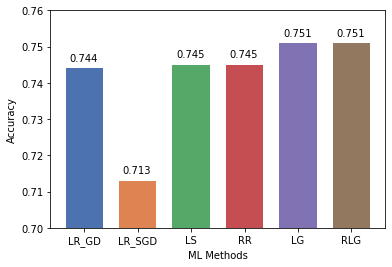

In [27]:
best_test_accs = [0.744, 0.713, 0.745, 0.745, 0.751, 0.751]
x = np.arange(len(best_test_accs))
plt.bar(x, best_test_accs, width=0.7, color=sns.color_palette('deep'))
for i, v in enumerate(best_test_accs):
    plt.text(x[i] - 0.28, v + 0.002, str(v))
plt.xticks(x, ('LR_GD', 'LR_SGD', 'LS', 'RR', 'LG', 'RLG'))
plt.ylim(bottom=0.7, top=0.76)
plt.xlabel('ML Methods')
plt.ylabel('Accuracy')
plt.show()

## Regularized Logistic Regression - with preprocessing

### Training

In [28]:
x_0, x_1, x_2, x_9, y_0, y_1, y_2, y_9 = LG_load_train_data_split(DATA_TRAIN_PATH = './data/train.csv')
test_x_0, test_x_1, test_x_2, test_x_9, id_0, id_1, id_2, id_9 = LG_load_test_data_split(DATA_TEST_PATH = './data/test.csv')

In [29]:
def logistic_regression_penalized_gradient_descent(y, x, lambda_, degree, gamma, threshold, max_iter):
    losses = []
    tx = build_poly(x, degree)
    w = np.zeros((tx.shape[1], 1))
    
    for iter in range(max_iter):
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        
        if iter % 5000 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss.item()))
        
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break         
    
    print("loss={l}, lambda={k}".format(l=calculate_loss(y, tx, w).item(), k=lambda_))
    return calculate_loss(y, tx, w), w

In [30]:
# find best lambda by cross validation
#lambda_0 = cross_validation_select_lambda(x_0, y_0, 2, 4, seed = 1)
#lambda_1 = cross_validation_select_lambda(x_1, y_1, 3, 4, seed = 1)
#lambda_2 = cross_validation_select_lambda(x_2, y_2, 3, 4, seed = 1)
#lambda_9 = cross_validation_select_lambda(x_9, y_9, 3, 4, seed = 1)

# report the best lambda here
lambda_0 = 0
lambda_1 = 1e-5
lambda_2 = 1e-4
lambda_9 = 1e-4

In [31]:
def transform(y):
    y = np.reshape(y, (y.shape[0], 1))
    return y
# reshape y and change y label
y_0 = transform(y_0)
y_1 = transform(y_1)
y_2 = transform(y_2)
y_9 = transform(y_9)

In [32]:
# generate prediction to test the local accuracy and create submission
def predict(x, w, degree, generate_submission):
    test = build_poly(x, degree)
    prediction = sigmoid(test.dot(w))
    if(generate_submission):
        prediction[np.where(prediction <= 0.5)] = 1
        prediction[np.where(prediction > 0.5)] = -1
    else:
        prediction[np.where(prediction <= 0.5)] = 0 
        prediction[np.where(prediction > 0.5)] = 1
    return prediction

In [33]:
# hyperparameter has been tuned and reported here
max_iter = 80000
gamma = 1e-7
threshold = 0.01

print('Group 0')
_, w_0 = logistic_regression_penalized_gradient_descent(y_0, x_0.values, lambda_0, 2, gamma, threshold, max_iter)
y_train_pred = predict(x_0.values, w_0, 2, False)
train_acc = compute_accuracy(y_0, y_train_pred)
print("training accuracy: ", train_acc)

print('\nGroup 1')
_, w_1 = logistic_regression_penalized_gradient_descent(y_1, x_1.values, lambda_1, 3, gamma, threshold, max_iter)
y_train_pred = predict(x_1.values, w_1, 3, False)
train_acc = compute_accuracy(y_1, y_train_pred)
print("training accuracy: ", train_acc)

print('\nGroup 2')
_, w_2 = logistic_regression_penalized_gradient_descent(y_2, x_2.values, lambda_2, 3, gamma, threshold, max_iter)
y_train_pred = predict(x_2.values, w_2, 3, False)
train_acc = compute_accuracy(y_2, y_train_pred)
print("training accuracy: ", train_acc)

print('\nGroup 3')
_, w_9 = logistic_regression_penalized_gradient_descent(y_9, x_9.values, lambda_9, 3, gamma, threshold, max_iter)
y_train_pred = predict(x_9.values, w_9, 3, False)
train_acc = compute_accuracy(y_9, y_train_pred)
print("training accuracy: ", train_acc)

Group 0
Current iteration=0, loss=51147.33045351836
Current iteration=5000, loss=32618.187217544502
Current iteration=10000, loss=32391.637662442154
Current iteration=15000, loss=32245.80615683664
Current iteration=20000, loss=32145.58644255044
Current iteration=25000, loss=32075.372749986083
loss=32049.174640625875, lambda=0
training accuracy:  [0.80283236]

Group 1
Current iteration=0, loss=48507.82598994609
Current iteration=5000, loss=33033.20935363068
loss=33132.32232789036, lambda=1e-05
training accuracy:  [0.78527336]

Group 2
Current iteration=0, loss=47213.02705666011
Current iteration=5000, loss=29159.839277081042
Current iteration=10000, loss=28780.021607563016
Current iteration=15000, loss=28685.232175798978
loss=28667.395463819426, lambda=0.0001
training accuracy:  [0.81704202]

Group 3
Current iteration=0, loss=26418.611639861756
Current iteration=5000, loss=7608.581695858295
loss=7550.900612394515, lambda=0.0001
training accuracy:  [0.93306921]


### Testing

In [34]:
# get prediction of testing data
y_test_hat_0 = predict(test_x_0, w_0, 2, True)
y_test_pred_0 = np.where(np.squeeze(y_test_hat_0.T) > 0.5, 1, -1)
y_test_hat_1 = predict(test_x_1, w_1, 3, True)
y_test_pred_1 = np.where(np.squeeze(y_test_hat_1.T) > 0.5, 1, -1)
y_test_hat_2 = predict(test_x_2, w_2, 3, True)
y_test_pred_2 = np.where(np.squeeze(y_test_hat_2.T) > 0.5, 1, -1)
y_test_hat_9 = predict(test_x_9, w_9, 3, True)
y_test_pred_9 = np.where(np.squeeze(y_test_hat_9.T) > 0.5, 1, -1)

# concatenate three predicted results
y_test_pred = np.concatenate((y_test_pred_0, y_test_pred_1), axis = 0)
y_test_pred = np.concatenate((y_test_pred, y_test_pred_2), axis = 0)
y_test_pred = np.concatenate((y_test_pred, y_test_pred_9), axis = 0)

# concatenate the indexs of three group
ids = np.concatenate((id_0, id_1), axis = 0)
ids = np.concatenate((ids, id_2), axis = 0)
ids = np.concatenate((ids, id_9), axis = 0)

In [35]:
create_csv_submission(ids, y_test_pred, 'RLG_w_pre.csv')

## DNN - without preprocessing

### Training

In [36]:
from nn import *

In [37]:
# change y label from (1, -1) to (1, 0)
nn_x_train = nor_x_train[:, 1:]
nn_x_val = nor_x_val[:, 1:]
nn_x_test = nor_x_test[:, 1:]
nn_y_train = np.where(y_train == -1, 0, y_train)
nn_y_val = np.where(y_val == -1, 0, y_val)

In [38]:
# set parameters
epochs = 50
lr = 0.001
batch_size = 250
nn_architecture = [
    {"input_dim": 30, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 1, "activation": "sigmoid"},
]

# train model, get model parameters
nn_params = train(nn_x_train.T, nn_y_train[np.newaxis,:], nn_x_val.T, nn_y_val[np.newaxis,:],
                  nn_architecture, epochs, lr, batch_size, False, 0, verbose=True)

Epoch: 00000 - 0.8s - loss: 0.4240 - acc: 0.8028 - val_loss: 0.3910 - val_acc: 0.8220
Epoch: 00001 - 0.9s - loss: 0.3861 - acc: 0.8249 - val_loss: 0.3802 - val_acc: 0.8271
Saving best model (epoch 2, val_acc: 0.8300)
Saving best model (epoch 2, val_loss: 0.3745)
Saving best model (epoch 3, val_acc: 0.8317)
Saving best model (epoch 3, val_loss: 0.3713)
Saving best model (epoch 4, val_loss: 0.3705)
Epoch: 00005 - 3.4s - loss: 0.3693 - acc: 0.8333 - val_loss: 0.3736 - val_acc: 0.8301
Saving best model (epoch 6, val_acc: 0.8319)
Saving best model (epoch 6, val_loss: 0.3694)
Saving best model (epoch 7, val_acc: 0.8339)
Saving best model (epoch 8, val_acc: 0.8349)
Saving best model (epoch 8, val_loss: 0.3661)
Saving best model (epoch 10, val_loss: 0.3649)
Epoch: 00010 - 4.2s - loss: 0.3639 - acc: 0.8362 - val_loss: 0.3649 - val_acc: 0.8347
Saving best model (epoch 12, val_acc: 0.8356)
Saving best model (epoch 14, val_acc: 0.8362)
Saving best model (epoch 14, val_loss: 0.3638)
Epoch: 00015 - 

In [39]:
nn_params = np.load('best_acc.npy', allow_pickle=True).item()
# nn_params = np.load('best_loss.npy', allow_pickle=True).item()

In [40]:
# get final output of the model
y_train_hat, _ = full_forward_propagation(nn_x_train.T, nn_params, NN_ARCHITECTURE)
y_val_hat, _ = full_forward_propagation(nn_x_val.T, nn_params, NN_ARCHITECTURE)

# compute loss and accuracy
train_loss = compute_nn_loss(y_train_hat, nn_y_train.reshape(nn_y_train.shape[0], 1).T)
val_loss = compute_nn_loss(y_val_hat, nn_y_val.reshape(nn_y_val.shape[0], 1).T)

train_acc = compute_nn_accuracy(y_train_hat, nn_y_train.reshape(nn_y_train.shape[0], 1).T)
val_acc = compute_nn_accuracy(y_val_hat, nn_y_val.reshape(nn_y_val.shape[0], 1).T)

print('Deep neural network')
print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Deep neural network
Training Loss: 0.3528 - Training Accuracy: 0.8419
Validation Loss: 0.3632 - Validation Accuracy: 0.8375


### Testing

In [41]:
# get prediction of testing data
y_test_hat, _ = full_forward_propagation(nn_x_test.T, nn_params, NN_ARCHITECTURE)
y_test_pred = np.where(np.squeeze(y_test_hat.T) > 0.5, 1, -1)

In [42]:
OUTPUT_PATH = 'nn_wo_pre.csv'
create_csv_submission(ids_test, y_test_pred, OUTPUT_PATH)

## DNN - with preprocessing

### Training

In [43]:
x_0, x_1, x_2, y_0, y_1, y_2 = load_train_data_split(DATA_TRAIN_PATH = './data/train.csv')
test_x_0, test_x_1, test_x_2, id_0, id_1, id_2 = load_test_data_split(DATA_TEST_PATH = './data/test.csv')

In [44]:
y_train_0, y_val_0, tX_train_0, tX_val_0 = train_val_split(y_0, x_0.values, 0.2)
y_train_1, y_val_1, tX_train_1, tX_val_1 = train_val_split(y_1, x_1.values, 0.2)
y_train_2, y_val_2, tX_train_2, tX_val_2 = train_val_split(y_2, x_2.values, 0.2)

# reshape data
def transform(tX, y):
    tX = tX.T
    y = np.reshape(y, (1, y.shape[0]))
    nn_y = np.where(y == -1, 0, y)
    return tX, nn_y

tX_train_0, y_train_0 = transform(tX_train_0, y_train_0)
tX_val_0, y_val_0 = transform(tX_val_0, y_val_0)
tX_train_1, y_train_1 = transform(tX_train_1, y_train_1)
tX_val_1, y_val_1 = transform(tX_val_1, y_val_1)
tX_train_2, y_train_2 = transform(tX_train_2, y_train_2)
tX_val_2, y_val_2 = transform(tX_val_2, y_val_2)

In [45]:
epochs = 50

# train model 0, get model parameters
learning_rate = 0.001
batch_size = 64
nn_architecture_0 = [
    {"input_dim": 18, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 1, "activation": "sigmoid"},
]
param_0 = train(tX_train_0, y_train_0, tX_val_0, y_val_0, nn_architecture_0, epochs, learning_rate, batch_size, True, 0)

Epoch: 00000 - 1.3s - loss: 0.3651 - acc: 0.8392 - val_loss: 0.3486 - val_acc: 0.8448
Epoch: 00001 - 1.3s - loss: 0.3429 - acc: 0.8488 - val_loss: 0.3455 - val_acc: 0.8471
Saving best model (epoch 2, val_loss: 0.3446)
Saving best model (epoch 4, val_loss: 0.3421)
Saving best model (epoch 5, val_acc: 0.8481)
Saving best model (epoch 5, val_loss: 0.3410)
Epoch: 00005 - 5.0s - loss: 0.3354 - acc: 0.8525 - val_loss: 0.3410 - val_acc: 0.8481
Saving best model (epoch 8, val_loss: 0.3408)
Epoch: 00010 - 5.4s - loss: 0.3320 - acc: 0.8539 - val_loss: 0.3410 - val_acc: 0.8479
Saving best model (epoch 11, val_acc: 0.8490)
Saving best model (epoch 11, val_loss: 0.3402)
Epoch: 00015 - 4.8s - loss: 0.3299 - acc: 0.8544 - val_loss: 0.3427 - val_acc: 0.8478
Saving best model (epoch 20, val_acc: 0.8491)
Epoch: 00020 - 4.5s - loss: 0.3280 - acc: 0.8552 - val_loss: 0.3419 - val_acc: 0.8491
Epoch: 00025 - 4.6s - loss: 0.3260 - acc: 0.8556 - val_loss: 0.3443 - val_acc: 0.8482
Epoch: 00030 - 4.4s - loss: 0.

In [46]:
epochs = 50
learning_rate = 0.001
batch_size = 64

# train model 1, get model parameters
nn_architecture_1 = [
    {"input_dim": 21, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 1, "activation": "sigmoid"},
]
param_1 = train(tX_train_1, y_train_1, tX_val_1, y_val_1, nn_architecture_1, epochs, learning_rate, batch_size, True, 1)

Epoch: 00000 - 0.8s - loss: 0.4546 - acc: 0.7858 - val_loss: 0.4243 - val_acc: 0.8064
Epoch: 00001 - 0.7s - loss: 0.4116 - acc: 0.8137 - val_loss: 0.4144 - val_acc: 0.8112
Saving best model (epoch 2, val_loss: 0.4112)
Saving best model (epoch 3, val_acc: 0.8145)
Saving best model (epoch 3, val_loss: 0.4086)
Saving best model (epoch 4, val_acc: 0.8147)
Saving best model (epoch 4, val_loss: 0.4069)
Epoch: 00005 - 2.9s - loss: 0.3936 - acc: 0.8216 - val_loss: 0.4095 - val_acc: 0.8136
Saving best model (epoch 6, val_acc: 0.8150)
Saving best model (epoch 6, val_loss: 0.4069)
Saving best model (epoch 8, val_loss: 0.4055)
Saving best model (epoch 9, val_acc: 0.8164)
Saving best model (epoch 9, val_loss: 0.4039)
Saving best model (epoch 10, val_loss: 0.4037)
Epoch: 00010 - 3.7s - loss: 0.3856 - acc: 0.8249 - val_loss: 0.4037 - val_acc: 0.8154
Saving best model (epoch 12, val_acc: 0.8164)
Saving best model (epoch 12, val_loss: 0.4021)
Saving best model (epoch 14, val_acc: 0.8185)
Saving best mo

In [47]:
epochs = 50
learning_rate = 0.005
batch_size = 64

# train model 2, get model parameters
nn_architecture_2 = [
    {"input_dim": 29, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 1, "activation": "sigmoid"},
]
param_2 = train(tX_train_2, y_train_2, tX_val_2, y_val_2, nn_architecture_2, epochs, learning_rate, batch_size, True, 2)

Epoch: 00000 - 0.7s - loss: 0.3991 - acc: 0.8197 - val_loss: 0.3768 - val_acc: 0.8395
Epoch: 00001 - 0.7s - loss: 0.3658 - acc: 0.8402 - val_loss: 0.3673 - val_acc: 0.8403
Saving best model (epoch 2, val_acc: 0.8464)
Saving best model (epoch 2, val_loss: 0.3586)
Saving best model (epoch 5, val_loss: 0.3578)
Epoch: 00005 - 2.7s - loss: 0.3425 - acc: 0.8500 - val_loss: 0.3578 - val_acc: 0.8451
Saving best model (epoch 6, val_loss: 0.3577)
Saving best model (epoch 8, val_loss: 0.3576)
Epoch: 00010 - 3.3s - loss: 0.3285 - acc: 0.8566 - val_loss: 0.3605 - val_acc: 0.8457
Epoch: 00015 - 3.4s - loss: 0.3207 - acc: 0.8597 - val_loss: 0.3652 - val_acc: 0.8447
Epoch: 00020 - 3.5s - loss: 0.3125 - acc: 0.8617 - val_loss: 0.3667 - val_acc: 0.8454
Epoch: 00025 - 3.5s - loss: 0.3047 - acc: 0.8661 - val_loss: 0.3723 - val_acc: 0.8413
Epoch: 00030 - 3.6s - loss: 0.2997 - acc: 0.8686 - val_loss: 0.3845 - val_acc: 0.8373
Epoch: 00035 - 3.5s - loss: 0.2950 - acc: 0.8706 - val_loss: 0.3861 - val_acc: 0.83

In [48]:
param_0 = np.load('best_acc_0.npy', allow_pickle=True).item()
param_1 = np.load('best_acc_1.npy', allow_pickle=True).item()
param_2 = np.load('best_acc_2.npy', allow_pickle=True).item()

In [49]:
# get final output of the model - group 0 
y_train_hat, _ = full_forward_propagation(tX_train_0, param_0, nn_architecture_0)
y_val_hat, _ = full_forward_propagation(tX_val_0, param_0, nn_architecture_0)

# compute loss and accuracy
train_loss = compute_nn_loss(y_train_hat, y_train_0)
val_loss = compute_nn_loss(y_val_hat, y_val_0)

train_acc = compute_nn_accuracy(y_train_hat, y_train_0)
val_acc = compute_nn_accuracy(y_val_hat, y_val_0)

print('Deep neural network - jetnum = 0')
print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

# get final output of the model
y_train_hat, _ = full_forward_propagation(tX_train_1, param_1, nn_architecture_1)
y_val_hat, _ = full_forward_propagation(tX_val_1, param_1, nn_architecture_1)

# compute loss and accuracy - group 1
train_loss = compute_nn_loss(y_train_hat, y_train_1)
val_loss = compute_nn_loss(y_val_hat, y_val_1)

train_acc = compute_nn_accuracy(y_train_hat, y_train_1)
val_acc = compute_nn_accuracy(y_val_hat, y_val_1)

print('\n Deep neural network - jetnum = 1')
print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

# get final output of the model
y_train_hat, _ = full_forward_propagation(tX_train_2, param_2, nn_architecture_2)
y_val_hat, _ = full_forward_propagation(tX_val_2, param_2, nn_architecture_2)

# compute loss and accuracy - group 2
train_loss = compute_nn_loss(y_train_hat, y_train_2)
val_loss = compute_nn_loss(y_val_hat, y_val_2)

train_acc = compute_nn_accuracy(y_train_hat, y_train_2)
val_acc = compute_nn_accuracy(y_val_hat, y_val_2)

print('\n Deep neural network - jetnum = 2')
print("Training Loss: {:.4f} - Training Accuracy: {:.4f}".format(train_loss, train_acc))
print("Validation Loss: {:.4f} - Validation Accuracy: {:.4f}".format(val_loss, val_acc))

Deep neural network - jetnum = 0
Training Loss: 0.3251 - Training Accuracy: 0.8556
Validation Loss: 0.3419 - Validation Accuracy: 0.8491

 Deep neural network - jetnum = 1
Training Loss: 0.3715 - Training Accuracy: 0.8325
Validation Loss: 0.4065 - Validation Accuracy: 0.8190

 Deep neural network - jetnum = 2
Training Loss: 0.3443 - Training Accuracy: 0.8492
Validation Loss: 0.3586 - Validation Accuracy: 0.8464


### Testing

In [50]:
# get prediction of testing data
y_test_hat_0, _ = full_forward_propagation(test_x_0.values.T, param_0, nn_architecture_0)
y_test_pred_0 = np.where(np.squeeze(y_test_hat_0.T) > 0.5, 1, -1)
y_test_hat_1, _ = full_forward_propagation(test_x_1.values.T, param_1, nn_architecture_1)
y_test_pred_1 = np.where(np.squeeze(y_test_hat_1.T) > 0.5, 1, -1)
y_test_hat_2, _ = full_forward_propagation(test_x_2.T, param_2, nn_architecture_2)
y_test_pred_2 = np.where(np.squeeze(y_test_hat_2.T) > 0.5, 1, -1)

# concatenate three predicted results
y_test_pred_tmp = np.concatenate((y_test_pred_0, y_test_pred_1), axis = 0)
y_test_pred = np.concatenate((y_test_pred_tmp, y_test_pred_2), axis = 0)

# concatenate the indexs of three group
ids = np.concatenate((id_0, id_1), axis = 0)
ids = np.concatenate((ids, id_2), axis = 0)

In [51]:
OUTPUT_PATH = 'nn_w_pre.csv'
create_csv_submission(ids, y_test_pred, OUTPUT_PATH)